In [1]:
#basic import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#data aqistion
train_sp = pd.read_csv("train_spaceship.csv")
test_sp = pd.read_csv("test_spaceship.csv")

In [3]:
train_sp.head()
#categorical - HomePlanet,CryoSleep,Destination,VIP
#target - Transported
#numerical - Age,RoomService,FoofCourt,ShoppingMall,Spa,VRDeck
#string - PassengerId,Cabin,Name

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
train_sp.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


<Axes: xlabel='Transported', ylabel='count'>

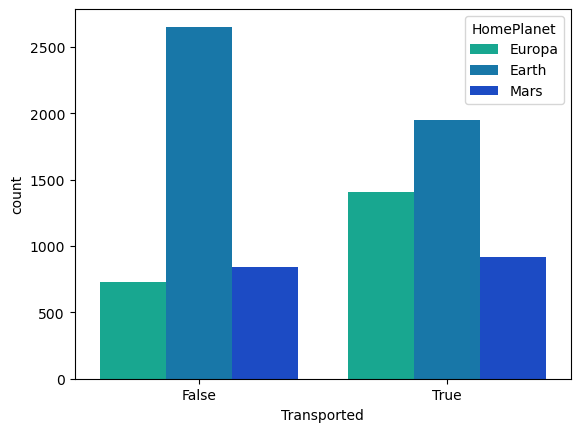

In [6]:
#visualization
#target column countplot with other categorical
sns.countplot(x="Transported",data=train_sp,hue="HomePlanet",palette="winter_r")
#most people from class -0 (not transported) are from earth
#same for class 1 but its more evenly distributed

<Axes: xlabel='Transported', ylabel='count'>

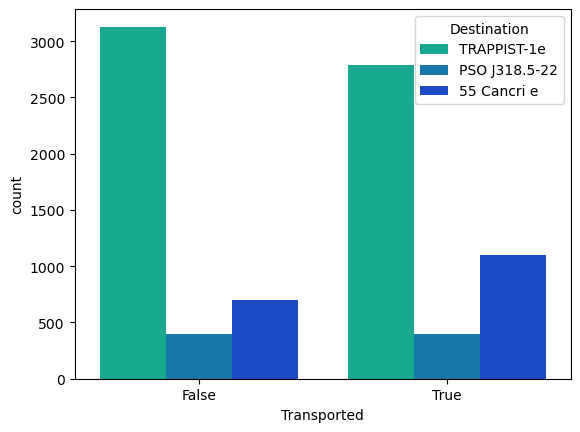

In [7]:
sns.countplot(x="Transported",data=train_sp,hue="Destination",palette="winter_r")
#most people from both classes 0,1 had same destination -TRAPPIST-1e

<Axes: xlabel='Transported', ylabel='count'>

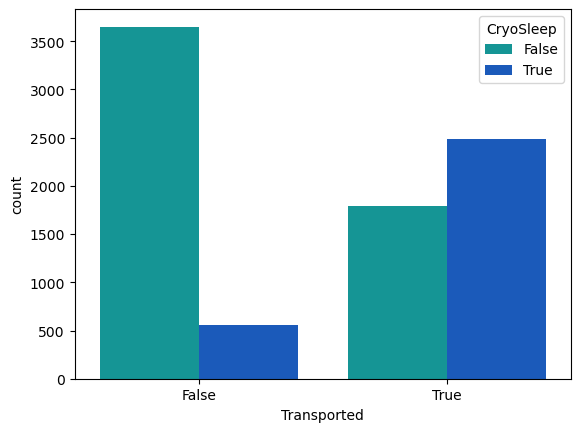

In [8]:
sns.countplot(x="Transported",data=train_sp,hue="CryoSleep",palette="winter_r")
#most people from class 0 were in cryosleep

<Axes: xlabel='Transported', ylabel='count'>

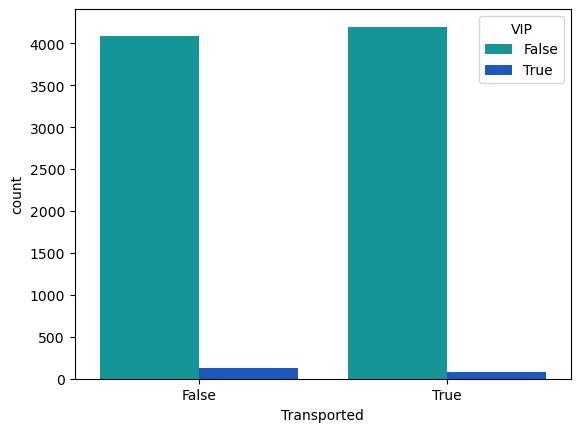

In [9]:
sns.countplot(x="Transported",data=train_sp,hue="VIP",palette="winter_r")

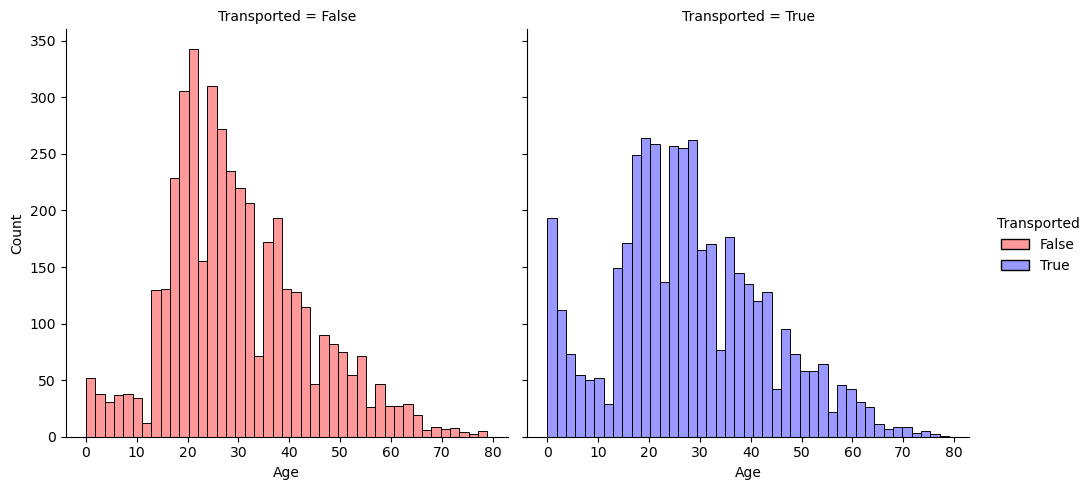

In [10]:
#age vs target
facet_kws = {"hue":"Transported","palette":{0:"red",1:"blue"}}
sns.displot(x="Age",data=train_sp,col="Transported",**facet_kws,alpha=0.4)
#age is more or less equally distributed among both columns 

In [ ]:
#pairplot for rest of numerical
sns.pairplot(train_sp,hue='Transported',palette="magma")

In [13]:
#converting categorical columns
cat_ft = ["HomePlanet","CryoSleep","Destination","VIP"]
train_sp = pd.get_dummies(train_sp,columns=cat_ft,drop_first=True)

In [14]:
test_sp = pd.get_dummies(test_sp,columns=cat_ft,drop_first=True)

In [15]:
train_sp.drop(["PassengerId","Cabin","Name"],axis=1,inplace=True)

In [16]:
test_sp.drop(["PassengerId","Cabin","Name"],axis=1,inplace=True)

In [38]:
train_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        8693 non-null   float64
 1   RoomService                8693 non-null   float64
 2   FoodCourt                  8693 non-null   float64
 3   ShoppingMall               8693 non-null   float64
 4   Spa                        8693 non-null   float64
 5   VRDeck                     8693 non-null   float64
 6   Transported                8693 non-null   bool   
 7   HomePlanet_Europa          8693 non-null   uint8  
 8   HomePlanet_Mars            8693 non-null   uint8  
 9   CryoSleep_True             8693 non-null   uint8  
 10  Destination_PSO J318.5-22  8693 non-null   uint8  
 11  Destination_TRAPPIST-1e    8693 non-null   uint8  
 12  VIP_True                   8693 non-null   uint8  
dtypes: bool(1), float64(6), uint8(6)
memory usage: 4

In [37]:
test_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        4277 non-null   float64
 1   RoomService                4277 non-null   float64
 2   FoodCourt                  4277 non-null   float64
 3   ShoppingMall               4277 non-null   float64
 4   Spa                        4277 non-null   float64
 5   VRDeck                     4277 non-null   float64
 6   HomePlanet_Europa          4277 non-null   uint8  
 7   HomePlanet_Mars            4277 non-null   uint8  
 8   CryoSleep_True             4277 non-null   uint8  
 9   Destination_PSO J318.5-22  4277 non-null   uint8  
 10  Destination_TRAPPIST-1e    4277 non-null   uint8  
 11  VIP_True                   4277 non-null   uint8  
dtypes: float64(6), uint8(6)
memory usage: 225.7 KB


In [39]:
#data split
X_train = train_sp.drop("Transported",axis=1)
y_train = train_sp["Transported"]
X_test = test_sp

In [40]:
#Model - 1 DecisionTree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [41]:
#model-1 training
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [42]:
#testing
predictions_dtree = dtree.predict(X_test)

In [43]:
test_2 = pd.read_csv("test_spaceship.csv")
pred_2 = pd.DataFrame(predictions_dtree,columns=["Transported"])
pred_2 = pd.concat([pred_2,test_2["PassengerId"]],axis=1)
pred_2.set_index("PassengerId",inplace=True)
pred_2.to_csv("titanic_spaceship_dtree.csv")

In [44]:
#Model 2-RandomForest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=2000)

In [45]:
#model - 2 training
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=2000)

In [46]:
#model-2 test
predictions_rfc = rfc.predict(X_test)

In [47]:
test_2 = pd.read_csv("test_spaceship.csv")
pred_2 = pd.DataFrame(predictions_rfc,columns=["Transported"])
pred_2 = pd.concat([pred_2,test_2["PassengerId"]],axis=1)
pred_2.set_index("PassengerId",inplace=True)
pred_2.to_csv("titanic_spaceship_rfc.csv")

In [48]:
#preprocessing data for log reg
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
st.fit(X_train)
X_train_lr = st.transform(X_train)
st.fit(X_test) 
X_test_lr = st.transform(X_test)

In [49]:
#Model-3 Logistic regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [50]:
#model-3 training
log_reg.fit(X_train_lr,y_train)

LogisticRegression()

In [51]:
#model -3 testing 
predictions_log_reg = log_reg.predict(X_test_lr)

In [52]:
test_2 = pd.read_csv("test_spaceship.csv")
pred_2 = pd.DataFrame(predictions_log_reg,columns=["Transported"])
pred_2 = pd.concat([pred_2,test_2["PassengerId"]],axis=1)
pred_2.set_index("PassengerId",inplace=True)
pred_2.to_csv("titanic_spaceship_log_reg.csv")